https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [11]:
train_data =  pd.read_csv('data/fraudTrain.csv', sep=",")
test_data = pd.read_csv('data/fraudTest.csv', sep=",")

In [12]:
# Do not need below columns or should not be using them
train_data = train_data.drop(columns=['Unnamed: 0', 'cc_num','first', 'last', 'trans_num', 'street', 'unix_time'])
test_data = test_data.drop(columns=['Unnamed: 0', 'cc_num','first', 'last', 'trans_num', 'street', 'unix_time'])

In [13]:
# Create an age column and drop the dob column

train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = train_data['trans_date_trans_time'].dt.year - train_data['dob'].dt.year

train_data['age'] -= ((train_data['trans_date_trans_time'].dt.month < train_data['dob'].dt.month) |
              ((train_data['trans_date_trans_time'].dt.month == train_data['dob'].dt.month) &
               (train_data['trans_date_trans_time'].dt.day < train_data['dob'].dt.day))).astype(int)

train_data = train_data.drop(columns=['dob'])

# Convert Gender column to binary column\
train_data["gender"] = train_data["gender"].apply(lambda x: int(x == "M"))



In [14]:
#train_data['job'].unique

train_data["is_wknd"] = train_data["trans_date_trans_time"].dt.day_name().apply(lambda x : int(((x == "Sunday") | (x == "saturday"))))

def time_of_day(x):
    if x >=0 and x < 6: return "Night"
    elif x>= 6 and x <= 12: return "Morning"
    elif x> 12 and x <= 15: return "Afternoon"
    elif x> 15 and x <= 20: return "Evening"
    elif x> 20 and x <= 24: return "Night"
        
train_data["time_of_day"] = train_data["trans_date_trans_time"].dt.hour.apply(time_of_day)
train_data["month"] = train_data["trans_date_trans_time"].dt.month_name()
train_data["day_of_week"] = train_data["trans_date_trans_time"].dt.day_name()

In [15]:
train_data = train_data.drop(columns=['trans_date_trans_time'])

In [16]:
job_category_mapping = {
    # Healthcare
    'Psychologist, counselling': 'Healthcare',
    'Special educational needs teacher': 'Education',
    'Physiotherapist': 'Healthcare',
    'Psychologist, forensic': 'Healthcare',
    'Therapist, occupational': 'Healthcare',
    'Counsellor': 'Healthcare',
    'Ambulance person': 'Healthcare',
    'Nurse, mental health': 'Healthcare',
    'Nurse, children\'s': 'Healthcare',
    'Doctor, hospital': 'Healthcare',
    'Doctor, general practice': 'Healthcare',
    'Paediatric nurse': 'Healthcare',
    'Psychiatric nurse': 'Healthcare',
    'Clinical biochemist': 'Healthcare',
    'Pharmacist, community': 'Healthcare',
    'Physiological scientist': 'Healthcare',
    'Psychotherapist': 'Healthcare',
    'Clinical psychologist': 'Healthcare',
    'Health visitor': 'Healthcare',
    
    # Education
    'Special educational needs teacher': 'Education',
    'Primary school teacher': 'Education',
    'Secondary school teacher': 'Education',
    'Teacher, English as a foreign language': 'Education',
    'Further education lecturer': 'Education',
    'Higher education careers adviser': 'Education',
    'Educational psychologist': 'Education',
    'Teaching laboratory technician': 'Education',
    'Teacher, early years/pre': 'Education',
    'Teacher, special educational needs': 'Education',
    'Teacher, adult education': 'Education',
    'Education officer, community': 'Education',
    'Librarian, academic': 'Education',
    'Careers information officer': 'Education',
    'Museum/gallery exhibitions officer': 'Education',
    
    # Engineering
    'Engineer, land': 'Engineering',
    'Engineer, biomedical': 'Engineering',
    'Engineer, mining': 'Engineering',
    'Engineer, technical sales': 'Engineering',
    'Engineer, electronics': 'Engineering',
    'Engineer, communications': 'Engineering',
    'Engineer, structural': 'Engineering',
    'Engineer, building services': 'Engineering',
    'Engineer, civil (consulting)': 'Engineering',
    'Engineer, civil (contracting)': 'Engineering',
    'Mechanical engineer': 'Engineering',
    'Electrical engineer': 'Engineering',
    'Chemical engineer': 'Engineering',
    'Civil engineer': 'Engineering',
    'Engineer, technical': 'Engineering',
    'Mining engineer': 'Engineering',
    'Engineer, materials': 'Engineering',
    'Water engineer': 'Engineering',
    'Environmental consultant': 'Engineering',
    'Control and instrumentation engineer': 'Engineering',
    'Software engineer': 'Engineering',
    
    # Information Technology
    'IT trainer': 'Information Technology',
    'Systems developer': 'Information Technology',
    'Applications developer': 'Information Technology',
    'Systems analyst': 'Information Technology',
    'Network engineer': 'Information Technology',
    'Database administrator': 'Information Technology',
    'Web designer': 'Information Technology',
    'Programmer, multimedia': 'Information Technology',
    'Multimedia programmer': 'Information Technology',
    'Telecommunications researcher': 'Information Technology',
    'Database designer': 'Information Technology',
    'Data scientist': 'Information Technology',
    'IT consultant': 'Information Technology',
    'Data analyst': 'Information Technology',
    'Software developer': 'Information Technology',
    
    # Finance
    'Corporate investment banker': 'Finance',
    'Financial adviser': 'Finance',
    'Financial trader': 'Finance',
    'Investment analyst': 'Finance',
    'Tax inspector': 'Finance',
    'Chartered accountant': 'Finance',
    'Risk analyst': 'Finance',
    'Pensions consultant': 'Finance',
    'Chartered loss adjuster': 'Finance',
    'Loss adjuster, chartered': 'Finance',
    'Purchasing manager': 'Finance',
    'Operations geologist': 'Finance',
    'Accounting technician': 'Finance',
    'Banker': 'Finance',
    'Finance manager': 'Finance',
    'Tax adviser': 'Finance',
    
    # Media
    'Designer, multimedia': 'Media',
    'Designer, furniture': 'Media',
    'Designer, jewellery': 'Media',
    'Designer, ceramics/pottery': 'Media',
    'Designer, industrial/product': 'Media',
    'Designer, interior/spatial': 'Media',
    'Animator': 'Media',
    'Fine artist': 'Media',
    'Illustrator': 'Media',
    'Photographer': 'Media',
    'Film/video editor': 'Media',
    'Video editor': 'Media',
    'Producer, radio': 'Media',
    'Producer, television/film/video': 'Media',
    'Journalist, newspaper': 'Media',
    'Editor, magazine features': 'Media',
    'Editor, film/video': 'Media',
    'Advertising account executive': 'Media',
    'Copywriter, advertising': 'Media',
    'Public relations account executive': 'Media',
    
    # Legal
    'Patent attorney': 'Legal',
    'Solicitor, Scotland': 'Legal',
    'Solicitor': 'Legal',
    'Barrister': 'Legal',
    'Chartered legal executive (England and Wales)': 'Legal',
    'Legal secretary': 'Legal',
    'Claims inspector/assessor': 'Legal',
    'Chartered loss adjuster': 'Legal',
    'Trade mark attorney': 'Legal',
    
    # Social Services 
    'Probation officer': 'Social Services ',
    'Youth worker': 'Social Services ',
    'Social researcher': 'Social Services ',
    'Volunteer coordinator': 'Social Services ',
    'Social work assistant': 'Social Services ',
    'Counselling psychologist': 'Social Services ',
    'Mental health nurse': 'Social Services ',
    
    # Science
    'Scientist, research (maths)': 'Science',
    'Research officer, trade union': 'Science',
    'Research officer, political party': 'Science',
    'Research scientist (physical sciences)': 'Science',
    'Geochemist': 'Science',
    'Geologist, engineering': 'Science',
    'Biochemist, clinical': 'Science',
    'Immunologist': 'Science',
    'Phytotherapist': 'Science',
    'Meteorologist': 'Science',
    
    # Construction
    'Surveyor, land': 'Construction',
    'Surveyor, minerals': 'Construction',
    'Surveyor, commercial/residential': 'Construction',
    'Surveyor, rural practice': 'Construction',
    'Architect': 'Construction',
    'Landscape architect': 'Construction',
    'Town planner': 'Construction',
    'Building surveyor': 'Construction',
    'Building control surveyor': 'Construction',
    
    # Retail
    'Retail merchandiser': 'Retail',
    'Retail buyer': 'Retail',
    'Sales professional, IT': 'Retail',
    'Sales executive': 'Retail',
    'Sales manager': 'Retail',
    'Retail manager': 'Retail',
    'Visual merchandiser': 'Retail',
    
    # Public Services
    'Police officer': 'Public Services',
    'Civil Service fast streamer': 'Public Services',
    'Immigration officer': 'Public Services',
    'Regulatory affairs officer': 'Public Services',
    'Social services officer': 'Public Services',
    'Community development worker': 'Public Services',
    'Exhibitions officer, museum/gallery': 'Public Services',
    'Museum/gallery conservator': 'Public Services',
    'Public relations officer': 'Public Services',
    'Public affairs consultant': 'Public Services',
    
    # Transport
    'Transport planner': 'Transport',
    'Pilot, airline': 'Transport',
    'Air traffic controller': 'Transport',
    'Shipping broker': 'Transport',
    'Freight forwarder': 'Transport',
    'Logistics and distribution manager': 'Transport',
    'Supply chain manager': 'Transport',
}



# Apply the categorization
train_data['job_category'] = train_data['job'].apply(lambda x: job_category_mapping.get(x, 'Other'))

train_data.head()


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,is_wknd,time_of_day,month,day_of_week,job_category
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,30,0,Night,January,Tuesday,Healthcare
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,40,0,Night,January,Tuesday,Education
2,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,56,0,Night,January,Tuesday,Other
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,51,0,Night,January,Tuesday,Legal
4,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,32,0,Night,January,Tuesday,Other


In [17]:
train_data = train_data.drop(columns=['city','zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long'])
train_data.head()

,merchant,category,amt,gender,state,job,is_fraud,age,is_wknd,time_of_day,month,day_of_week,job_category
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,NC,"Psychologist, counselling",0,30,0,Night,January,Tuesday,Healthcare
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,WA,Special educational needs teacher,0,40,0,Night,January,Tuesday,Education
2,fraud_Lind-Buckridge,entertainment,220.11,1,ID,Nature conservation officer,0,56,0,Night,January,Tuesday,Other
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,MT,Patent attorney,0,51,0,Night,January,Tuesday,Legal
4,fraud_Keeling-Crist,misc_pos,41.96,1,VA,Dance movement psychotherapist,0,32,0,Night,January,Tuesday,Other


In [9]:
# train_data['category'] = train_data['category'].replace({'misc_net': 'misc_online', 
#                                                          'grocery_pos': 'grocery_pt_of_sale',
#                                                         'gas_transport': 'gas',
#                                                         'misc_pos' : 'misc_pt_of_sale',
#                                                         'grocery_net': 'grocery_online',
#                                                         'shopping_net': 'shopping_online',
#                                                          'shopping_pos': 'shopping_pt_of_sale',})


In [18]:
merchant_stats = train_data.groupby('merchant')['is_fraud'].agg(['sum', 'count'])
merchant_stats['merchant_fraud_prob'] = merchant_stats['sum'] / merchant_stats['count']
train_data = train_data.merge(merchant_stats[['merchant_fraud_prob']], on='merchant', how='left')

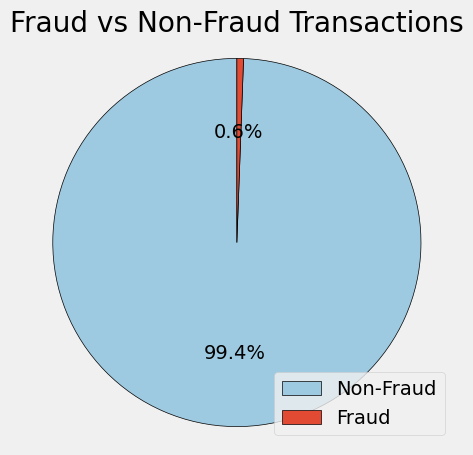

In [19]:
fraud_counts = train_data['is_fraud'].value_counts()
colors = ['#9ecae1', '#e34a33']


plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=['Non-Fraud', 'Fraud'], loc='lower right')
plt.axis('equal')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

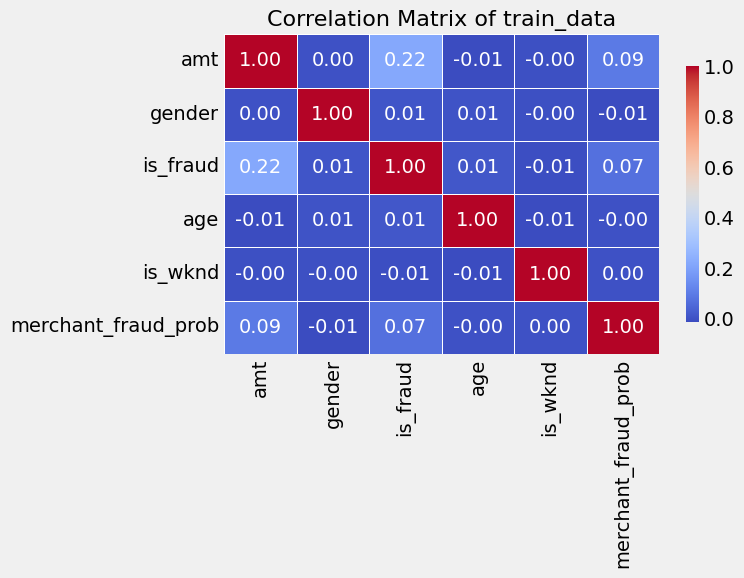

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we are using only numeric columns
numeric_columns = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Set the title and labels
plt.title('Correlation Matrix of train_data', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()





In [49]:
train_data.head()

,merchant,category,amt,gender,state,job,is_fraud,age,is_wknd,time_of_day,month,day_of_week,job_category,merchant_fraud_prob
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,NC,"Psychologist, counselling",0,30,0,Night,January,Tuesday,Healthcare,0.014207
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,WA,Special educational needs teacher,0,40,0,Night,January,Tuesday,Education,0.010787
2,fraud_Lind-Buckridge,entertainment,220.11,1,ID,Nature conservation officer,0,56,0,Night,January,Tuesday,Other,0.002111
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,MT,Patent attorney,0,51,0,Night,January,Tuesday,Legal,0.003444
4,fraud_Keeling-Crist,misc_pos,41.96,1,VA,Dance movement psychotherapist,0,32,0,Night,January,Tuesday,Other,0.003769


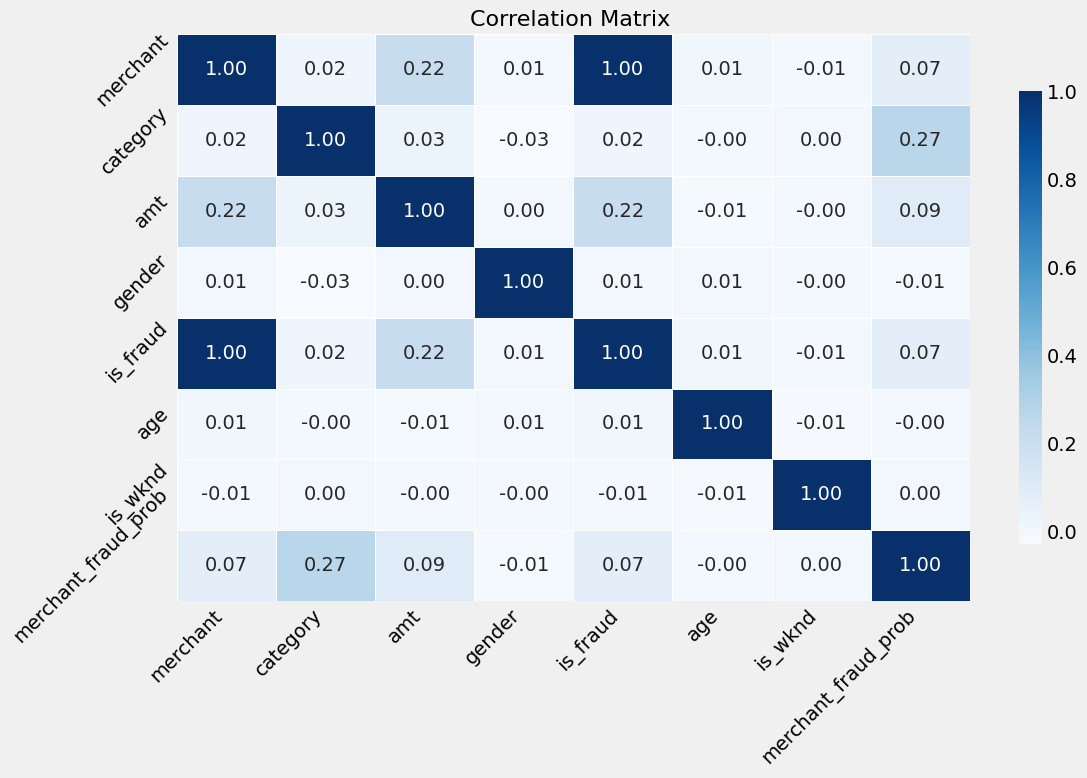

In [53]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns (e.g., 'fraud' column)
label_encoder = LabelEncoder()
train_data['category'] = label_encoder.fit_transform(train_data['category'])
train_data['merchant'] = label_encoder.fit_transform(train_data['is_fraud'])
# Now calculate the correlation matrix on the updated DataFrame
numeric_columns = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=45, ha='right')  # Rotate y labels
# Set the title and labels
plt.title('Correlation Matrix ', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


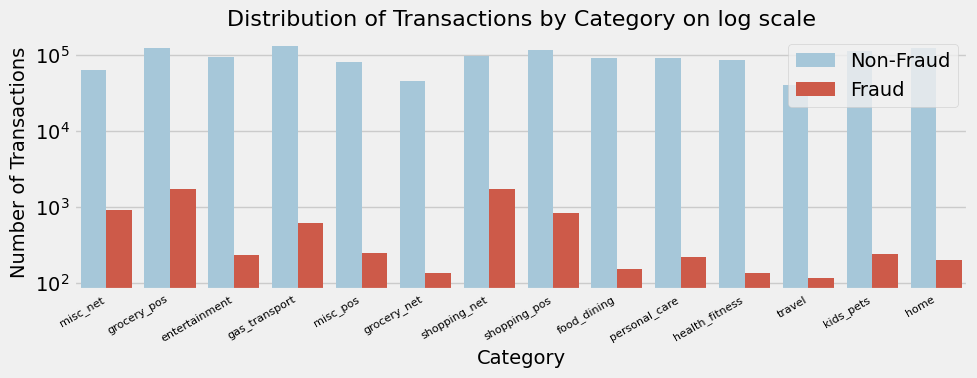

In [21]:
plt.figure(figsize=(10, 4))  

sns.countplot(data=train_data, x='category', hue='is_fraud', palette={0: '#9ecae1', 1: '#e34a33'}, dodge=True)
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.yscale('log')
plt.title('Distribution of Transactions by Category on log scale', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()

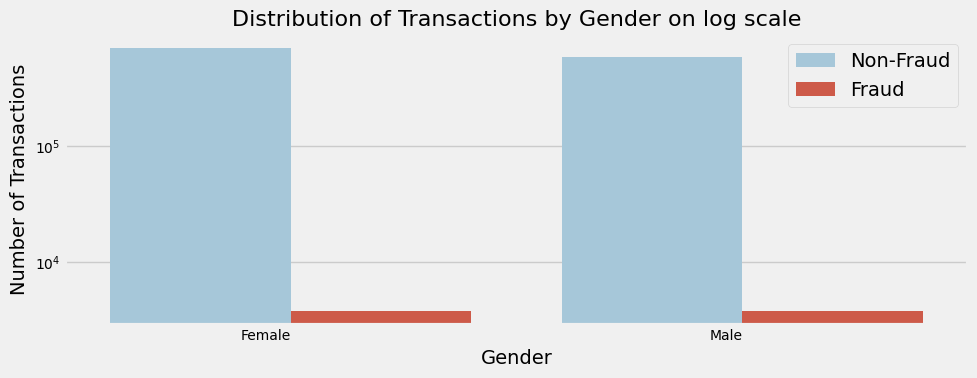

In [22]:
plt.figure(figsize=(10, 4))  

sns.countplot(data=train_data, x='gender', hue='is_fraud', palette={0: '#9ecae1', 1: '#e34a33'}, dodge=True)
plt.xticks(rotation=0, ha='right', fontsize=8)
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Transactions by Gender on log scale', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=14)
plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.xlabel('Gender', fontsize=14)
plt.tight_layout()
plt.show()

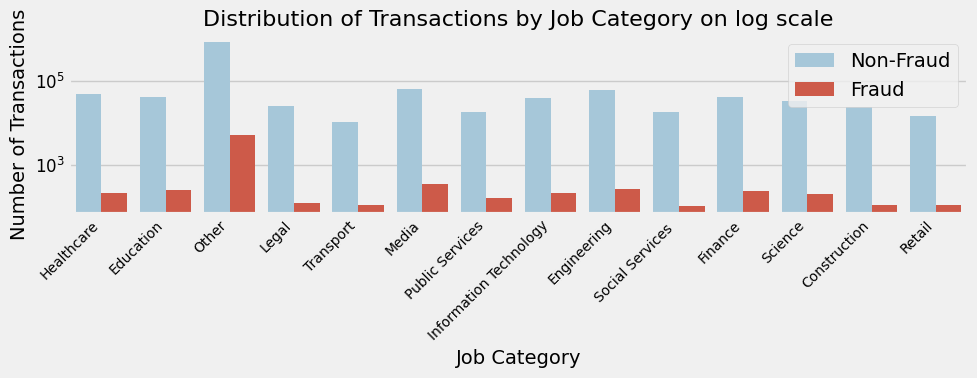

In [23]:
plt.figure(figsize=(10, 4))  

sns.countplot(data=train_data, x='job_category', hue='is_fraud', palette={0: '#9ecae1', 1: '#e34a33'}, dodge=True)
plt.xticks(rotation=0, ha='right', fontsize=8)
plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.title('Distribution of Transactions by Job Category on log scale', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=14)
plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.xlabel('Job Category', fontsize=14)
plt.tight_layout()
plt.show()

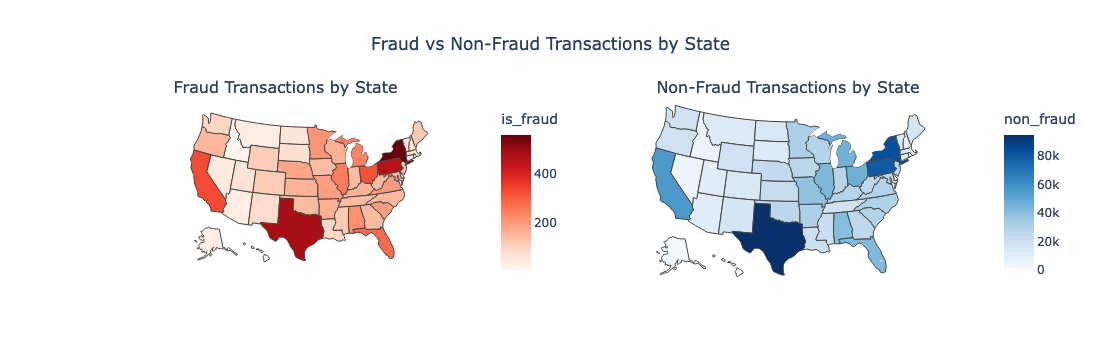

In [44]:
import plotly.express as px

train_state_fraud = train_data.groupby(['state']).sum('is_fraud').sort_values('is_fraud', ascending=False)
train_state_fraud.reset_index(level=0, inplace=True)
train_state_fraud = train_state_fraud.sort_values('state', ascending=True)
train_state_fraud.reset_index(inplace=True)
train_state_fraud.drop(columns='index', inplace=True)

train_state_non_fraud_counts = train_data.groupby('state').agg(non_fraud_count=('is_fraud', lambda x: (x == 0).sum()))
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=['Fraud Transactions by State', 'Non-Fraud Transactions by State'], 
                    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]])


fig.add_trace(go.Choropleth(
    locations=train_state_fraud['state'], 
    text=train_state_fraud['state'],
    z=train_state_fraud['is_fraud'].astype(float), 
    locationmode='USA-states', 
    colorscale='Reds',
    colorbar=dict(title="fraud", x=0.45)  
), row=1, col=1)

fig.add_trace(go.Choropleth(
    locations=train_state_non_fraud_counts.index, 
    text=train_state_non_fraud_counts.index,
    z=train_state_non_fraud_counts['non_fraud_count'].astype(float), 
    locationmode='USA-states', 
    colorscale='Blues',
    colorbar=dict(title="non-fraud", x=1.0)  
), row=1, col=2)

fig.update_geos(scope='usa', row=1, col=1)
fig.update_geos(scope='usa', row=1, col=2)


fig.update_layout(
    title_text="Fraud vs Non-Fraud Transactions by State",
    title_x=0.5,             
    title_xanchor='center'   
)


fig.show()


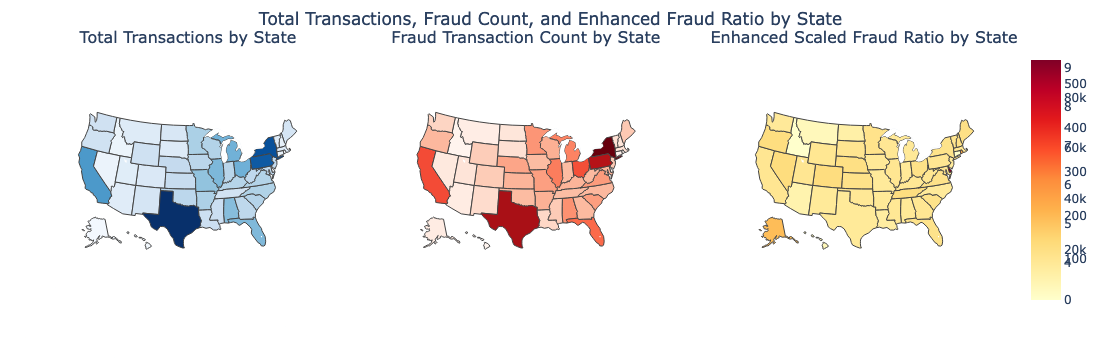

In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group data by state to compute total transactions, fraud transactions and fraud count
state_grouped = train_data.groupby('state').agg(
    total_transactions=('is_fraud', 'count'),        # Total transactions in each state
    total_fraud_transactions=('is_fraud', 'sum')    # Total fraud transactions in each state
).reset_index()

# Calculate fraud ratio (fraud probability)
state_grouped['fraud_ratio'] = state_grouped['total_fraud_transactions'] / state_grouped['total_transactions']

# Apply an enhanced log scaling to emphasize differences
state_grouped['scaled_fraud_ratio'] = np.log1p(state_grouped['fraud_ratio'] * 10000)  # Increased multiplier to 10000

# Create subplots for visualization (3 maps)
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=['Total Transactions by State', 'Fraud Transaction Count by State', 'Enhanced Scaled Fraud Ratio by State'], 
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}, {"type": "choropleth"}]],
    column_widths=[0.33, 0.33, 0.33]  # Adjust widths for better spacing
)

# Plot total transactions by state
fig.add_trace(go.Choropleth(
    locations=state_grouped['state'], 
    z=state_grouped['total_transactions'].astype(float), 
    locationmode='USA-states', 
    colorscale='Blues',
    text=state_grouped['state'],  
), row=1, col=1)

# Plot fraud transaction count by state
fig.add_trace(go.Choropleth(
    locations=state_grouped['state'], 
    z=state_grouped['total_fraud_transactions'].astype(float), 
    locationmode='USA-states', 
    colorscale='Reds',
    text=state_grouped.apply(lambda row: f"{row['state']}<br>Fraud Count: {row['total_fraud_transactions']}", axis=1),
), row=1, col=2)

# Plot enhanced scaled fraud ratio by state with improved color map
fig.add_trace(go.Choropleth(
    locations=state_grouped['state'], 
    z=state_grouped['scaled_fraud_ratio'].astype(float), 
    locationmode='USA-states', 
    colorscale='YlOrRd',  # Better color contrast for fraud ratios
    text=state_grouped.apply(lambda row: f"{row['state']}<br>Fraud Ratio: {row['fraud_ratio']:.4f}", axis=1),
), row=1, col=3)

# Update map settings
fig.update_geos(scope='usa', row=1, col=1)
fig.update_geos(scope='usa', row=1, col=2)
fig.update_geos(scope='usa', row=1, col=3)

# Update layout
fig.update_layout(
    title_text="Total Transactions, Fraud Count, and Enhanced Fraud Ratio by State",
    title_x=0.5,             
    title_xanchor='center',
    margin={"t": 50, "r": 0, "b": 50, "l": 50},  # Add margins for spacing, removed right margin
    showlegend=True
)

# Show the plot
fig.show()


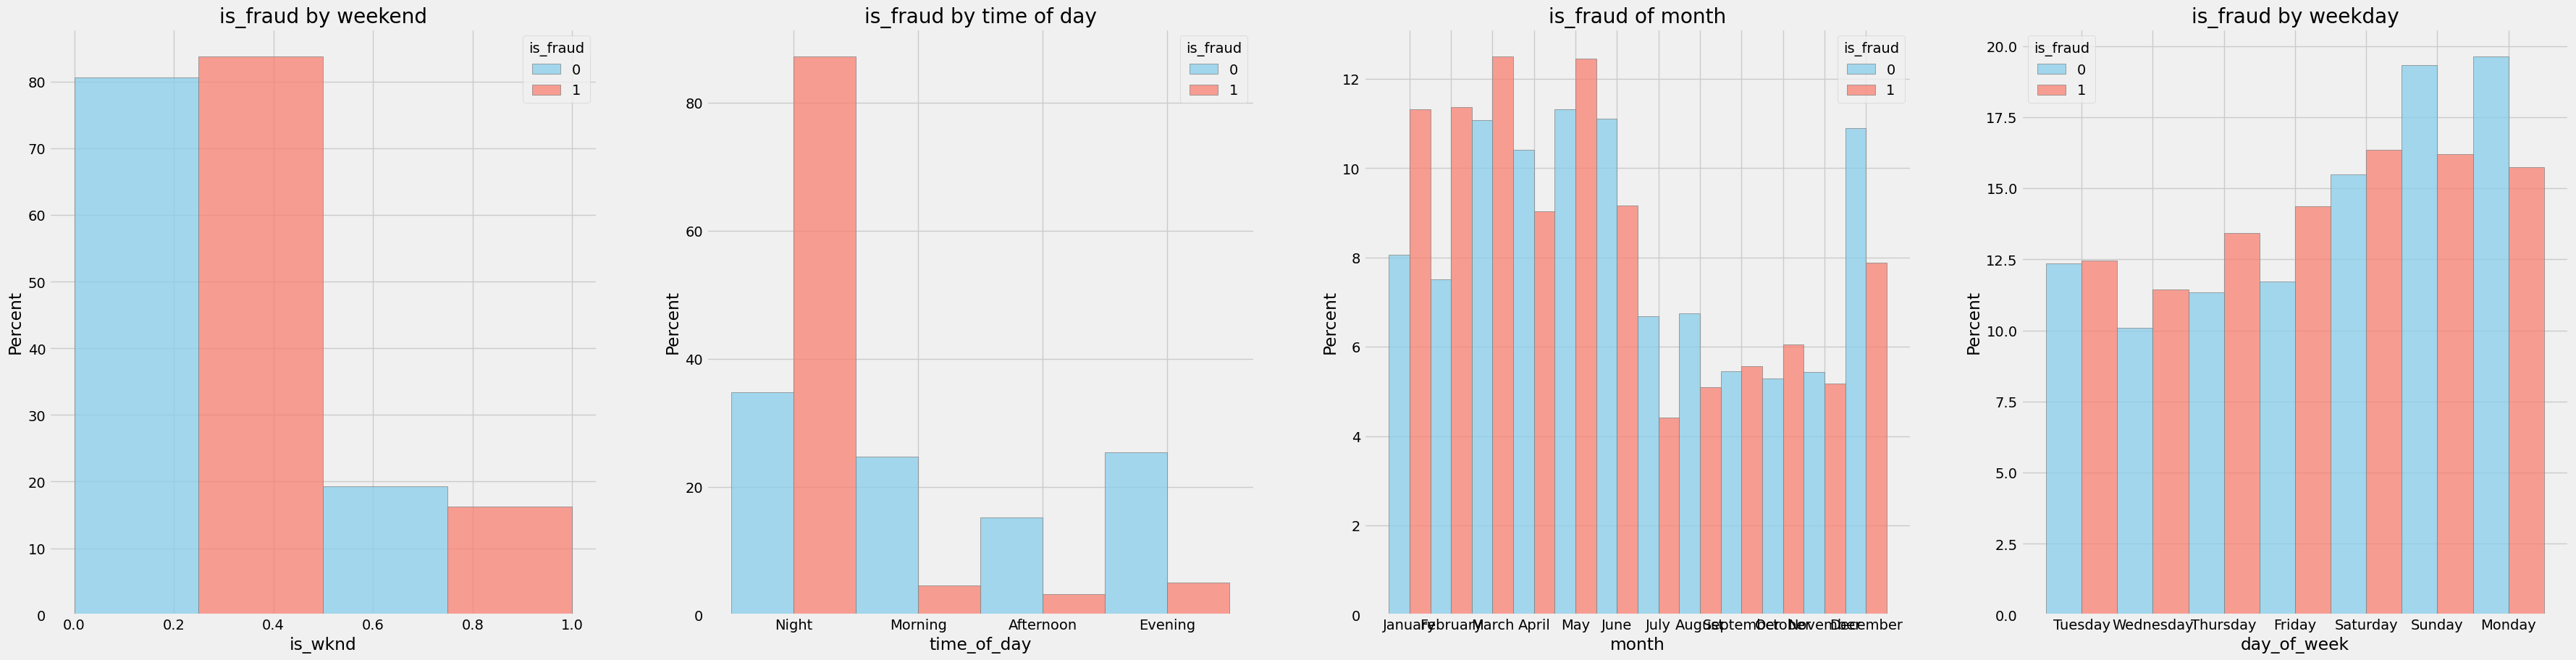

In [51]:

fig, ax = plt.subplots(1, 4, figsize=(40, 10))

# hour
sns.histplot(x='is_wknd', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=2, ax=ax[0], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[0].set_title('is_fraud by weekend')

# day
sns.histplot(x='time_of_day', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=4, ax=ax[1], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[1].set_title('is_fraud by time of day')

# month
sns.histplot(x='month', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=12, ax=ax[2], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[2].set_title('is_fraud of month')

# year
sns.histplot(x='day_of_week', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=7, ax=ax[3], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[3].set_title('is_fraud by weekday')

plt.show()

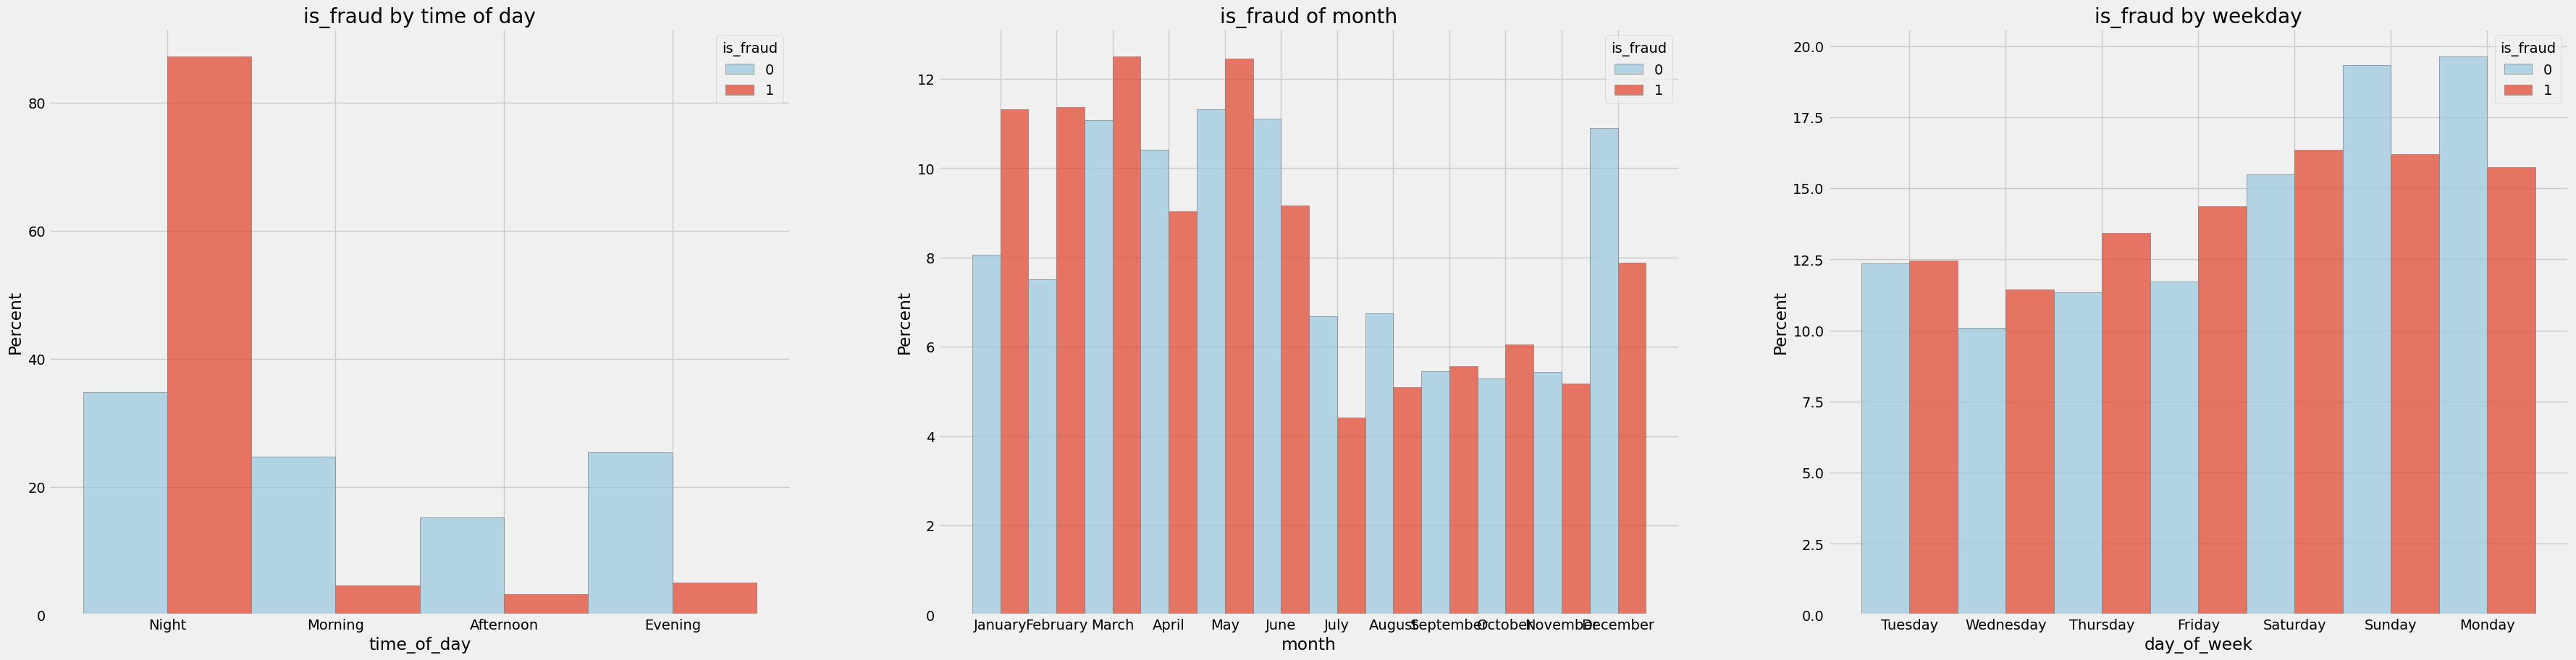

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data (assuming `train_data` is already loaded)

fig, ax = plt.subplots(1, 3, figsize=(40, 10))

# hour


# day
sns.histplot(x='time_of_day', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=4, ax=ax[0], palette={0: '#9ecae1', 1: '#e34a33'}, edgecolor='grey')
ax[0].set_title('is_fraud by time of day')

# month
sns.histplot(x='month', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=12, ax=ax[1], palette={0: '#9ecae1', 1: '#e34a33'}, edgecolor='grey')
ax[1].set_title('is_fraud of month')

# year
sns.histplot(x='day_of_week', data=train_data, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=7, ax=ax[2], palette={0: '#9ecae1', 1: '#e34a33'}, edgecolor='grey')
ax[2].set_title('is_fraud by weekday')

plt.show()


In [9]:
fraud_data = train_data[train_data['is_fraud'] == 1]

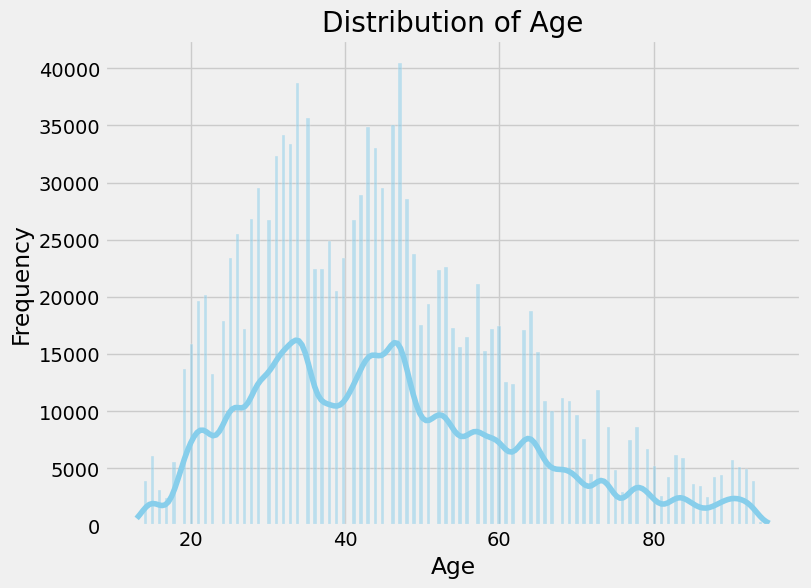

In [10]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


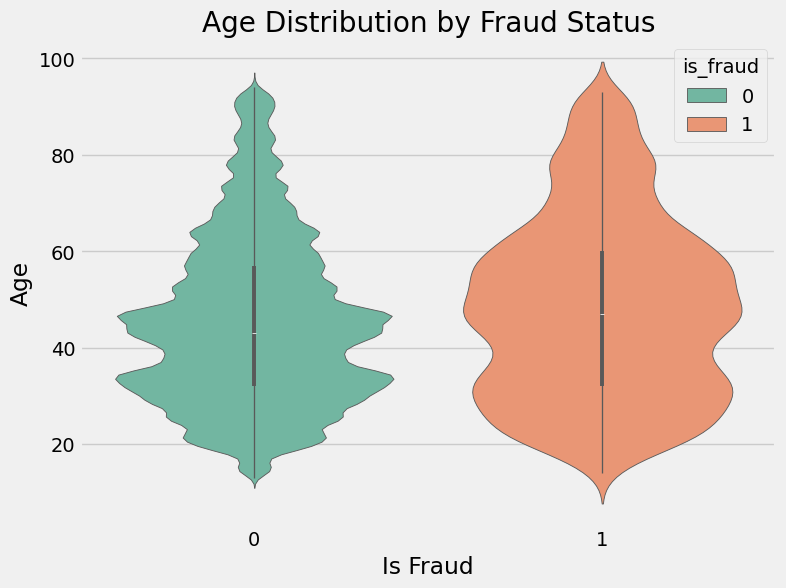

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='age', data=train_data, hue='is_fraud', palette='Set2')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Age')
plt.show()



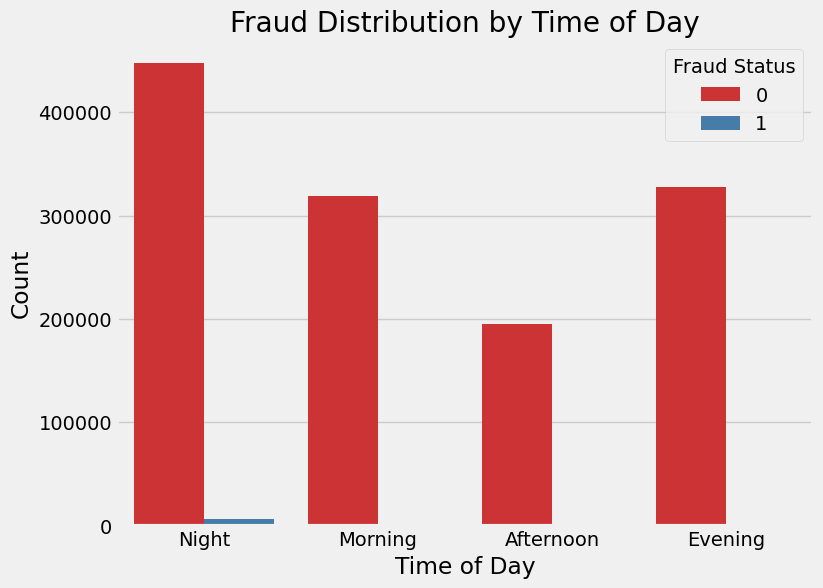

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='time_of_day', hue='is_fraud', data=train_data, palette='Set1')
plt.title('Fraud Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()


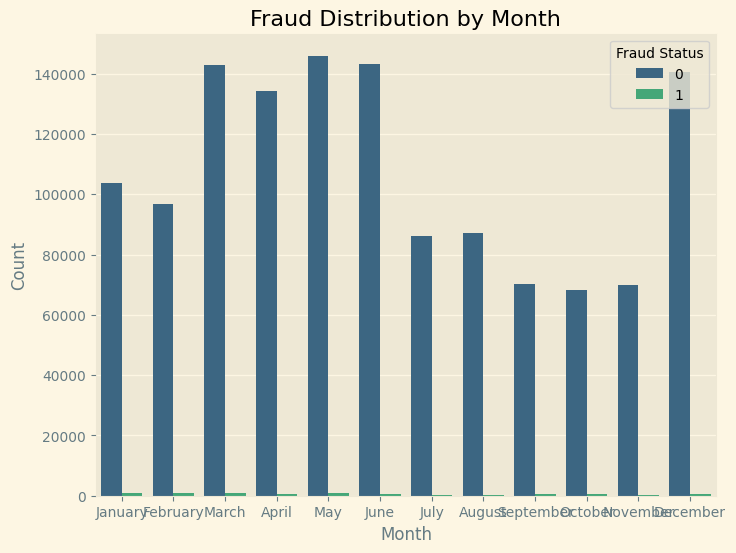

In [88]:
plt.figure(figsize=(8, 6))
sns.countplot(x='month', hue='is_fraud', data=train_data, palette='viridis')
plt.title('Fraud Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()



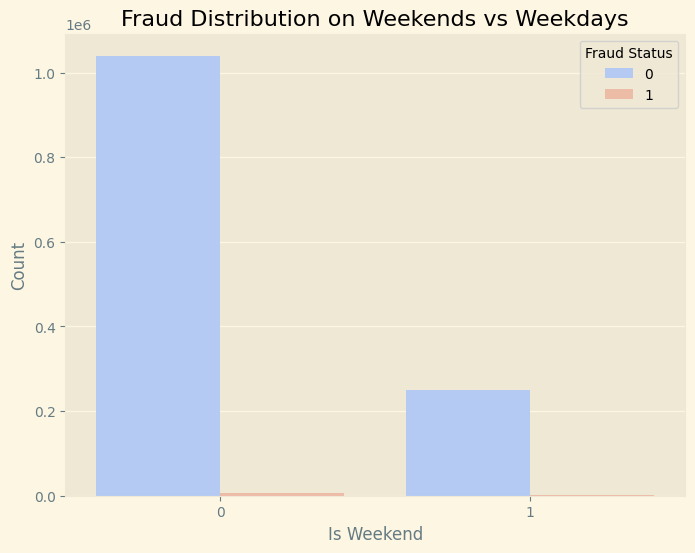

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_wknd', hue='is_fraud', data=train_data, palette='coolwarm')
plt.title('Fraud Distribution on Weekends vs Weekdays')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()


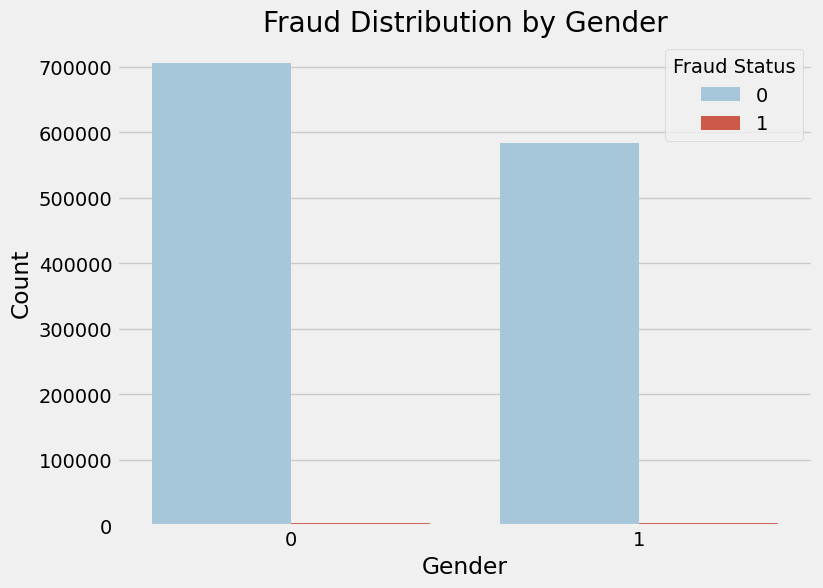

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data, palette={0: '#9ecae1', 1: '#e34a33'})
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()


In [98]:
len(fraud_data[fraud_data['gender']==0])

3735

In [99]:
len(fraud_data[fraud_data['gender']==1])

3771

In [105]:
min(train_data['age'])

13

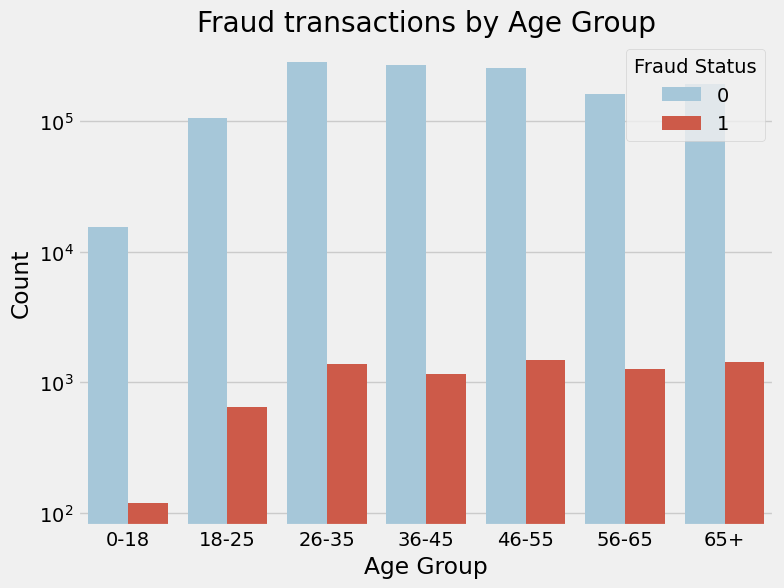

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bin age into categories
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # 6 labels for 7 bins

train_data['age_group'] = pd.cut(train_data['age'], bins=bins, labels=labels, right=False)

# Fraud rate by age group
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='is_fraud', data=train_data, palette={0: '#9ecae1', 1: '#e34a33'})

# Set title and labels
plt.title('Fraud transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Convert y-axis to logarithmic scale
plt.yscale('log')

# Adjust legend
plt.legend(title='Fraud Status', loc='upper right')

# Show the plot
plt.show()




/var/folders/xs/khd5b8zx0hvclct249rrs9hm0000gn/T/ipykernel_5257/723735678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['age_group'] = pd.cut(fraud_data['age'], bins=bins, labels=labels, right=False)


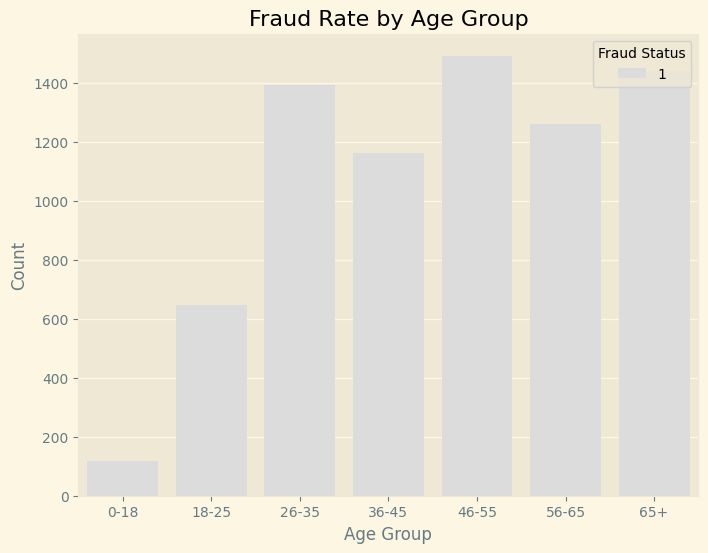

In [107]:
# Bin age into categories
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18','18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # 6 labels for 7 bins

fraud_data['age_group'] = pd.cut(fraud_data['age'], bins=bins, labels=labels, right=False)

# Fraud rate by age group
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='is_fraud', data=fraud_data, palette='coolwarm')
plt.title('Fraud Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Fraud Status', loc='upper right')
plt.show()

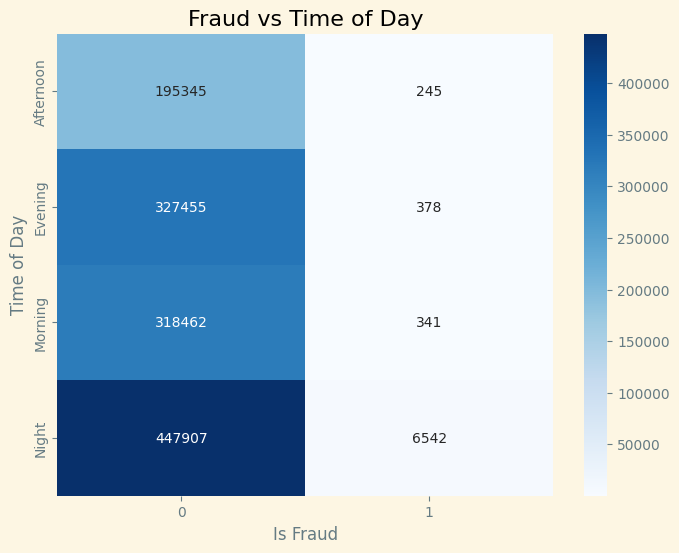

In [109]:
# Assuming 'time of day' is continuous, you could create a pivot table and plot the heatmap.
time_fraud_pivot = train_data.pivot_table(index='time_of_day', columns='is_fraud', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(time_fraud_pivot, cmap='Blues', annot=True, fmt='d')
plt.title('Fraud vs Time of Day')
plt.xlabel('Is Fraud')
plt.ylabel('Time of Day')
plt.show()


In [22]:
fraud_cnt_train = train_data[train_data['is_fraud'] == 1]['is_fraud'].count()
fraud_cnt_test = test_data[test_data['is_fraud'] == 1]['is_fraud'].count()

In [24]:
print("Number of fraud transactions in train: ", fraud_cnt_train)
print(f"Percetage of fraud transaction: {round(train_data['is_fraud'].mean()*100, 2)}%")

print("Number of fraud transactions in test: ", fraud_cnt_test)
print(f"Percetage of fraud transaction: {round(test_data['is_fraud'].mean()*100, 2)}%")

Number of fraud transactions in train:  7506
Percetage of fraud transaction: 0.58%
Number of fraud transactions in test:  2145
Percetage of fraud transaction: 0.39%


In [21]:
train_data_smote =  pd.read_csv('data/fraud_train_SMOTE.csv', sep=",")